Generate schematic of layer interpolation.
==========================================

* Generate 2*3 bar plot.
* Overlay the 

In [2]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

surfaces = np.array([[9,8,7],[8.5,7,5.5],[8,6,4]])/10
max_x = 1
max_y = 1
dx = max_x/surfaces.shape[1]
dy = max_y/surfaces.shape[0]

x_c = np.linspace(0,max_x,num=(surfaces.shape[1]+1))
y_c = np.linspace(0,max_x,num=(surfaces.shape[1]+1))

ta = np.pad(surfaces, ((0,1),(0,1)), mode='edge')
tb = np.pad(surfaces, ((1,0),(0,1)), mode='edge')
tc = np.pad(surfaces, ((0,1),(1,0)), mode='edge')
td = np.pad(surfaces, ((1,0),(1,0)), mode='edge')
corners = 0.25*(ta+tb+tc+td)

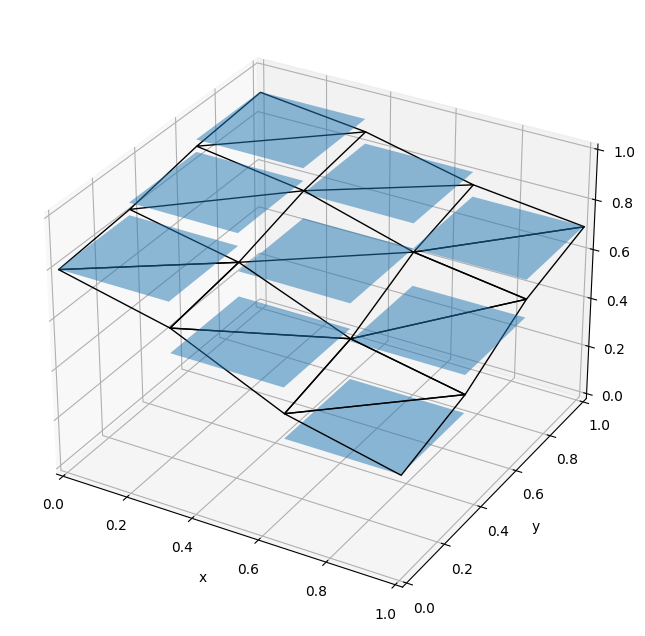

In [6]:
fig = mpl.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
for c in range(surfaces.shape[0]):
    for r in range(surfaces.shape[1]):
        #generate squares
        y_mid = max_y - (r + 0.5)*dy
        x_mid = (c + 0.5)*dx
        z = surfaces[r,c]
        X = [x_mid-dx/2, x_mid+dx/2, x_mid+dx/2, x_mid-dx/2]
        Y = [y_mid-dy/2, y_mid-dy/2, y_mid+dy/2, y_mid+dy/2]
        Z = [z, z, z, z]
        verts = [list(zip(X,Y,Z))]
        ax.add_collection3d(Poly3DCollection(verts, alpha=0.5))

        #generate top corner triangles in wireframe
        verts = [( (c*dx,max_y-r*dy,corners[r,c]) , ((c+1)*dx, max_y-r*dy, corners[r,c+1]), (c*dx, max_y-(r+1)*dy, corners[r+1,c]) )]
        ax.add_collection3d(Poly3DCollection(verts, facecolors=['none'], edgecolor='black'))

        if r == surfaces.shape[1] -1 or c == surfaces.shape[0] -1:
            verts = [( ((c+1)*dx, max_y-r*dy, corners[r,c+1]), ((c+1)*dx, max_y-(r+1)*dy, corners[r+1,c+1]) , (c*dx, max_y-(r+1)*dy, corners[r+1,c]) )]
            ax.add_collection3d(Poly3DCollection(verts, facecolors=['none'], edgecolor='black'))

mpl.savefig("FIG_surface_interpolate.png")
mpl.show()